In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from fitter import Fitter, get_common_distributions, get_distributions

In [11]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [2]:
url_20 = "/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2020-01.csv.gz"
url_21 = "/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2021-01.csv.gz"
df_20 = pd.read_csv(url_20, sep=';', low_memory=False)
df_21 = pd.read_csv(url_21, sep=';', low_memory=False)

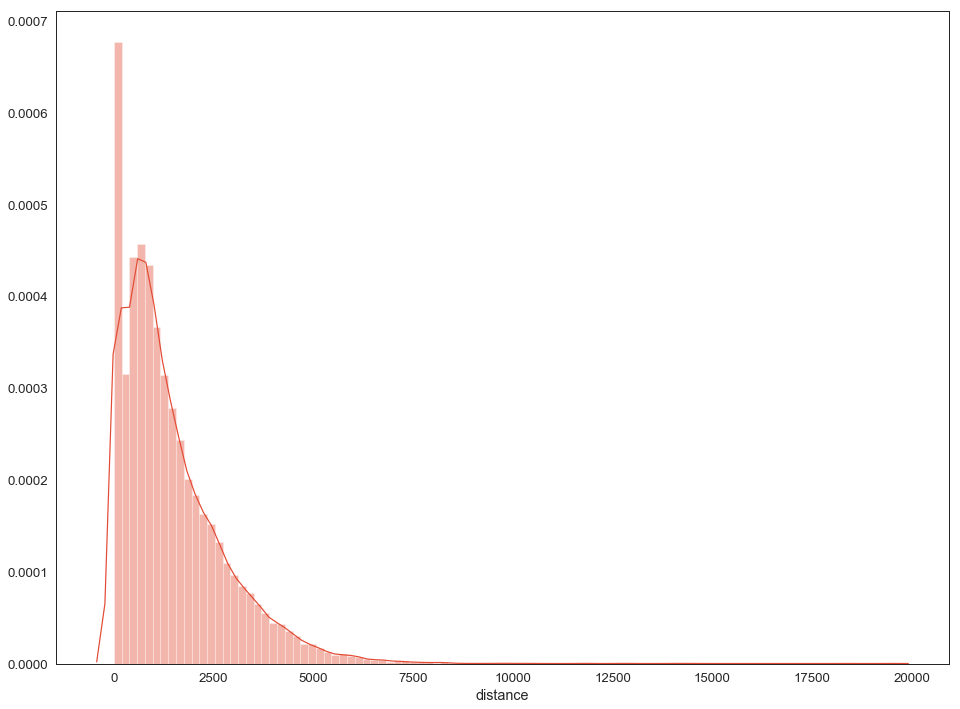

In [13]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_20['distance'], bins = 100)

In [14]:
distance = df_20["distance"].values

,aic,bic,kl_div,sumsquare_error
beta,2829.640493,-1.732475e+06,inf,7.542015e-08
gamma,2776.270753,-1.729044e+06,inf,7.964776e-08
norm,7570.463827,-1.623311e+06,inf,4.254719e-07
burr,2373.854838,-1.582915e+06,inf,8.066929e-07
lognorm,2578.018348,-1.567739e+06,inf,1.026182e-06


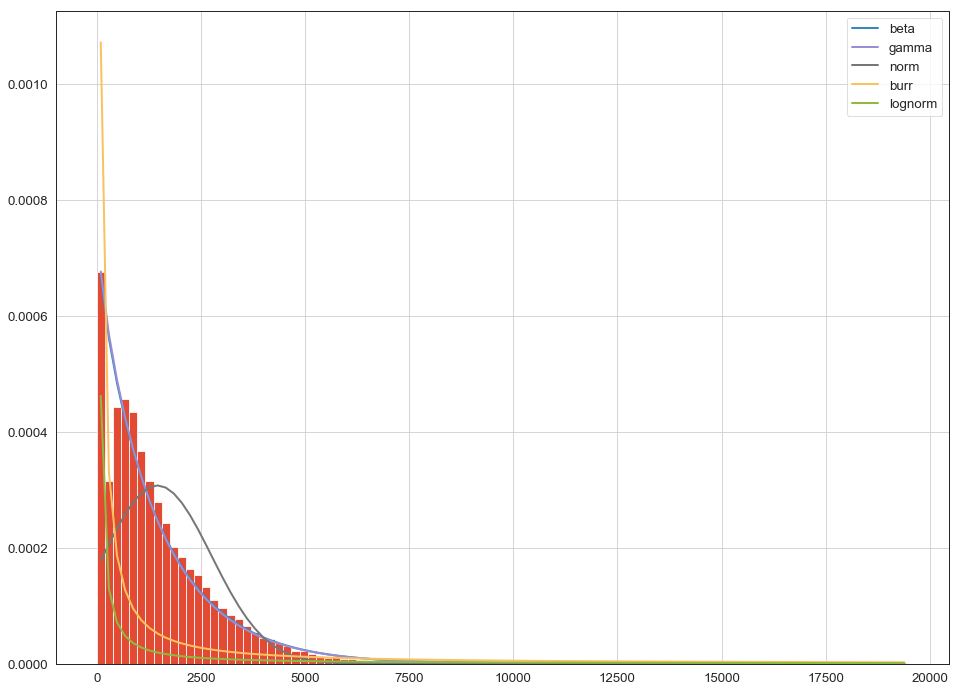

In [15]:
f = Fitter(distance,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [16]:
f.get_best(method = 'sumsquare_error')

{'beta': (0.9513632695936343,
  55.836484514733584,
  -2.285026732482373e-25,
  87069.75941881888)}

In [17]:
f.get_best(method = 'aic')

{'burr': (0.33285882605737505,
  2.947966608044836,
  -3.662714838612675e-16,
  2.5643106123931303)}

In [18]:
f.get_best(method = 'bic')

{'beta': (0.9513632695936343,
  55.836484514733584,
  -2.285026732482373e-25,
  87069.75941881888)}

## Droping 1 minute rides

In [19]:
df_20 = df_20[df_20.ride_time != 1]
df_21 = df_21[df_21.ride_time != 1]

In [23]:
distance2 = df_20["distance"].values

,aic,bic,kl_div,sumsquare_error
gamma,2971.327532,-1.651639e+06,inf,2.452295e-08
beta,3475.329277,-1.641670e+06,inf,2.911893e-08
norm,7602.873071,-1.510701e+06,inf,2.789368e-07
lognorm,2564.151926,-1.428427e+06,inf,1.152879e-06
burr,2366.167954,-1.426356e+06,inf,1.194587e-06


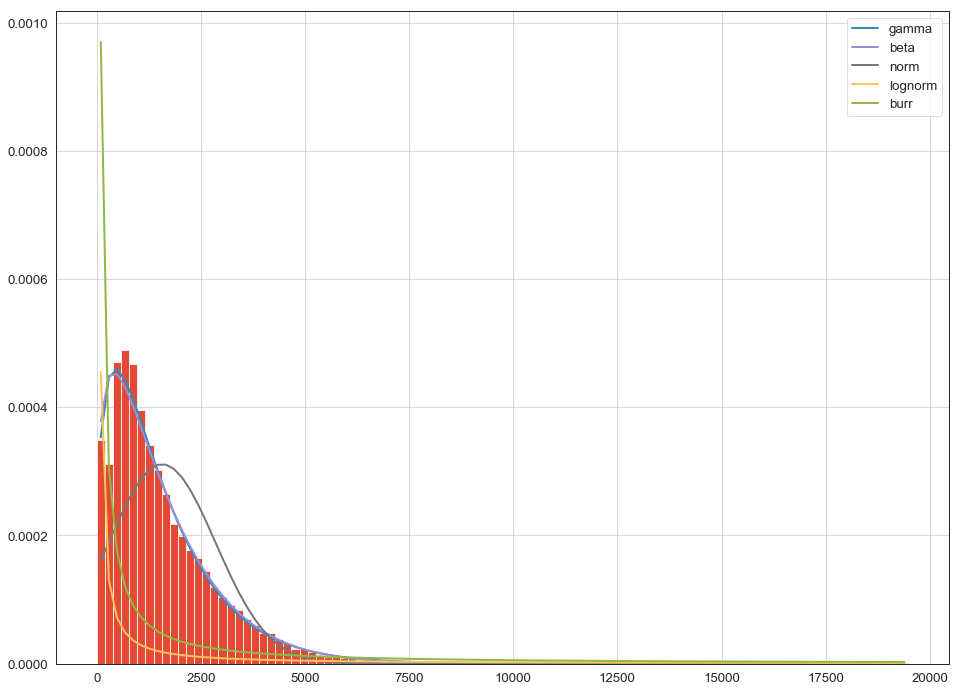

In [24]:
f = Fitter(distance2,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [25]:
f.get_best(method = 'sumsquare_error')

{'gamma': (1.4178249772268876, -19.985438180841058, 1121.371907298359)}

In [26]:
f.get_best(method = 'aic')

{'burr': (0.29458009780665345,
  3.3823797708253096,
  -3.3358525412091166e-26,
  1.1738383318437349)}

In [27]:
f.get_best(method = 'bic')

{'gamma': (1.4178249772268876, -19.985438180841058, 1121.371907298359)}

In [30]:
f.fitted_param["gamma"]

(1.4178249772268876, -19.985438180841058, 1121.371907298359)